In [3]:
import gensim
import pandas as pd

from pprint import pprint
from nltk.probability import FreqDist

from gensim import corpora
from gensim.utils import simple_preprocess
from nltk.tokenize import word_tokenize
from smart_open import smart_open
import os


from nltk.corpus import stopwords
# from gensim.utils import simple_preprocess, lemmatize
# from gensim.models import LdaModel, LdaMulticore
# import re
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/stefantippelt/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/stefantippelt/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/stefantippelt/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [7]:
ls data/greta_thunberg_for_25_years_countless.txt

data/greta_thunberg_for_25_years_countless.txt


In [8]:
with open('data/greta_thunberg_for_25_years_countless.txt', 'r') as f:
  content = f.read()

In [9]:
# Tokenize sentences into words
words = word_tokenize(content)

# cleaned_words = []
# for word in words:
#     if word not in stop_words and word.isalpha():
#         cleaned_words.append(word.lower())

In [10]:
def preprocess_words(words, stop_words):
    cleaned_words = []
    for word in words:
        if word not in stop_words and word.isalpha():
            cleaned_words.append(word.lower())
    return cleaned_words

In [11]:
cleaned_words = preprocess_words(words=words, stop_words=stop_words)

In [14]:
FreqDist(cleaned_words).keys()

dict_keys(['for', 'years', 'countless', 'people', 'stood', 'front', 'united', 'nations', 'climate', 'conferences', 'asking', 'leaders', 'stop', 'emissions', 'but', 'clearly', 'worked', 'since', 'continue', 'rise', 'so', 'i', 'ask', 'anything', 'instead', 'media', 'start', 'treating', 'crisis', 'around', 'world', 'realize', 'political', 'failed', 'us', 'because', 'facing', 'existential', 'threat', 'time', 'road', 'madness', 'rich', 'countries', 'like', 'sweden', 'need', 'reducing', 'least', 'every', 'year', 'reach', 'degree', 'warming', 'target', 'you', 'would', 'think', 'everyone', 'talking', 'nothing', 'else', 'one', 'ever', 'even', 'mentions', 'nor', 'hardly', 'anyone', 'talk', 'midst', 'sixth', 'mass', 'extinction', 'species', 'going', 'extinct', 'single', 'day', 'furthermore', 'speak', 'aspect', 'equity', 'stated', 'everywhere', 'parisagreement', 'absolutely', 'necessary', 'make', 'work', 'global', 'scale', 'that', 'means', 'mine', 'get', 'zero', 'within', 'todays', 'emission', 'sp

In [17]:
word_counts = pd.Series(FreqDist(cleaned_words)).sort_values(ascending=False)

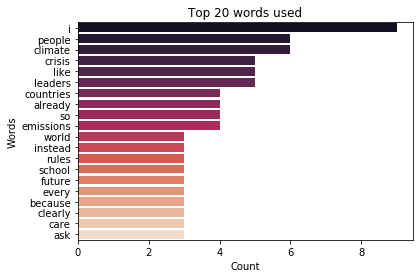

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.barplot(y=word_counts[:20].index, x=word_counts[:20].values, palette="rocket")
ax.set_title("Top 20 words used");
ax.set_xlabel("Count");
ax.set_ylabel("Words");

In [19]:
word_tags = nltk.pos_tag(cleaned_words)

In [20]:
word_tags[:10]

[('for', 'IN'),
 ('years', 'NNS'),
 ('countless', 'JJ'),
 ('people', 'NNS'),
 ('stood', 'VBD'),
 ('front', 'JJ'),
 ('united', 'JJ'),
 ('nations', 'NNS'),
 ('climate', 'NN'),
 ('conferences', 'NNS')]

In [21]:
nouns = [word[0] for word in word_tags if word[1] == 'NN']

In [22]:
noun_counts = pd.Series(FreqDist(nouns)).sort_values(ascending=False)

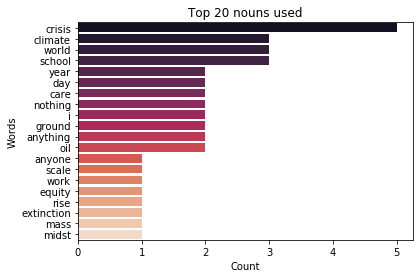

In [26]:
fig, ax = plt.subplots()
sns.barplot(y=noun_counts[:20].index, x=noun_counts[:20].values, palette="rocket")
ax.set_title("Top 20 nouns used");
ax.set_xlabel("Count");
ax.set_ylabel("Words");

In [24]:
dd = dictionary.token2id
[(k, d[k]) for k in sorted(d, key=d.get, reverse=True)]

NameError: name 'dictionary' is not defined